## Import Dependencies

In [1]:
#pip install opencv-python

In [2]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2022-11-30 14:58:35.979462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 14:58:36.103620: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-30 14:58:36.107261: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-30 14:58:36.107276: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [3]:
#Load training and test data
train = pd.read_csv('raw_data/sign_mnist_train.csv')
test = pd.read_csv('raw_data/sign_mnist_test.csv')

In [4]:
# Drop test labels from our test data
y_test = test['label']
X_test = test.drop('label', axis = 1)

In [5]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [6]:
X_test

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0        149     149     150     150     150     151     151     150     151   
1        126     128     131     132     133     134     135     135     136   
2         85      88      92      96     105     123     135     143     147   
3        203     205     207     206     207     209     210     209     210   
4        188     191     193     195     199     201     202     203     203   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7167     135     119     108     102     105      99      61     103     121   
7168     157     159     161     164     166     166     171     174     175   
7169     190     191     190     191     190     190     192     192     191   
7170     201     205     208     209     214     216     218     223     226   
7171     173     174     173     174     173     173     175     175     174   

      pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0         152  ...       138       148       127        89        82   
1         138  ...        47       104       194       183       186   
2         152  ...        68       166       242       227       230   
3         209  ...       154       248       247       248       253   
4         203  ...        26        40        64        48        29   
...       ...  ...       ...       ...       ...       ...       ...   
7167      133  ...       108       112       116       114       118   
7168      176  ...       213       213       213       214       213   
7169      192  ...       216       215       213       214       214   
7170      229  ...       112       169       255       255       237   
7171      175  ...       201       200       197       198       198   

      pixel780  pixel781  pixel782  pixel783  pixel784  
0           96       106       112       120       107  
1          184       184       184       182       180  
2          227       226       225       224       222  
3          236       230       240       253       255  
4           46        49        46        46        53  
...        ...       ...       ...       ...       ...  
7167       180       184       176       167       163  
7168       211       210       210       209       208  
7169       213       210       211       209       208  
7170       113        91        67        70        63  
7171       197       195       195       193       192  

[7172 rows x 784 columns]

We should merge datasets and use cross validation to train test split data.

In [7]:
#Inspect data
train.head(5)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  
2       198       195       194       195  
3       225       222       229       163  
4       157       163       164       179  

[5 rows x 785 columns]

Header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. 

In [8]:
test.head(5)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       120       107  
1       184       184       182       180  
2       226       225       224       222  
3       230       240       253       255  
4        49        46        46        53  

[5 rows x 785 columns]

In [9]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [11]:
#Check labels
y_train = train['label']
y_train

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [12]:
#len(labels)

In [13]:
#Check unique labels
#sorted(train['label'].drop_duplicates())
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions).

<AxesSubplot: xlabel='label', ylabel='count'>

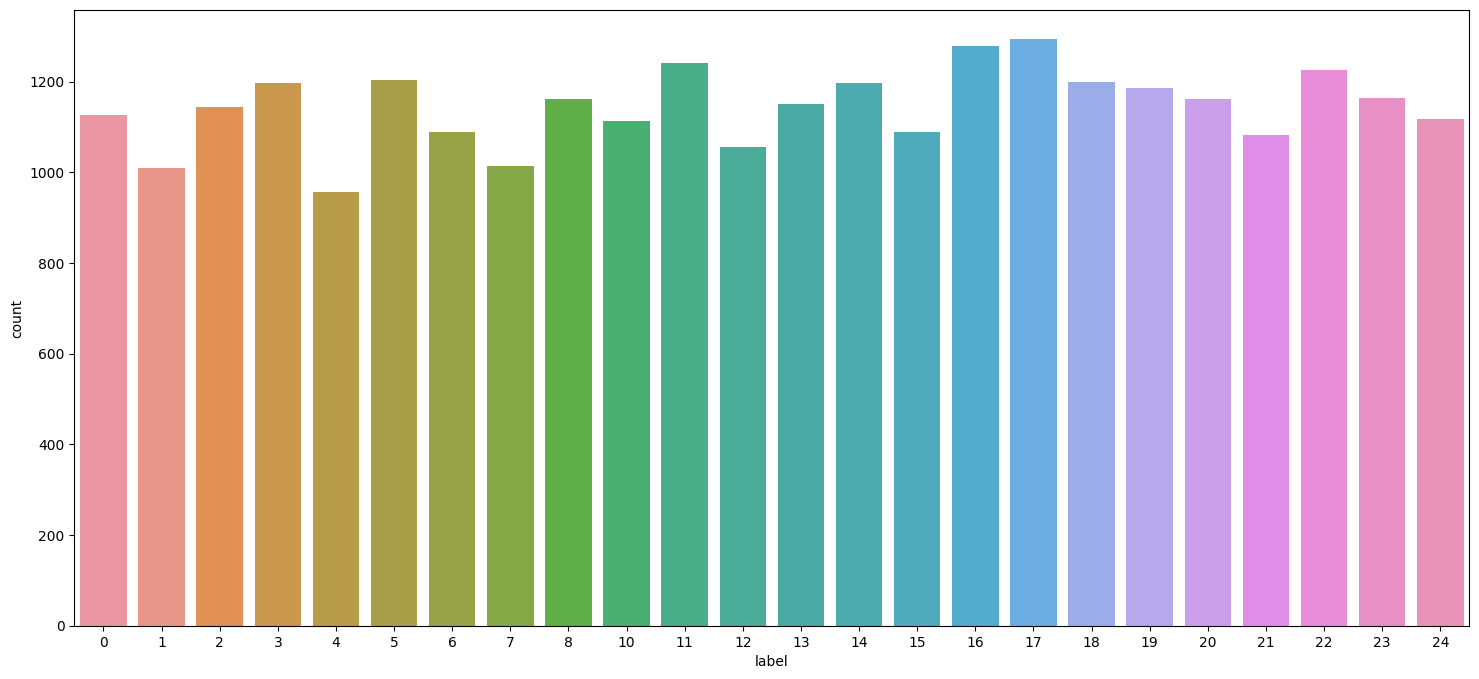

In [14]:
plt.figure(figsize=(18,8))
sns.countplot(x=y_train)

In [15]:
# Drop training labels from our training data
X_train = train.drop('label', axis = 1)

In [16]:
images = []
for i in X_train.values:
    images.append(np.reshape(i,(28,28)))
images    

[array([[107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
         165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
         170, 169],
        [111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160, 163, 164,
         170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172, 172, 171,
         171, 170],
        [113, 123, 131, 137, 142, 145, 150, 152, 155, 158, 161, 163, 164,
         172, 105, 142, 170, 171, 171, 171, 172, 172, 173, 173, 172, 171,
         171, 171],
        [116, 125, 133, 139, 143, 146, 151, 153, 156, 159, 162, 163, 167,
         167,  95, 144, 171, 172, 172, 172, 172, 172, 173, 173, 173, 172,
         172, 171],
        [117, 126, 134, 140, 145, 149, 153, 156, 158, 161, 163, 164, 175,
         156,  87, 154, 172, 173, 173, 173, 173, 173, 174, 174, 174, 173,
         172, 172],
        [119, 128, 136, 142, 146, 150, 153, 156, 159, 163, 165, 164, 184,
         148,  89, 164, 172, 174, 174, 174, 174, 175, 175, 174, 175, 174,
         173

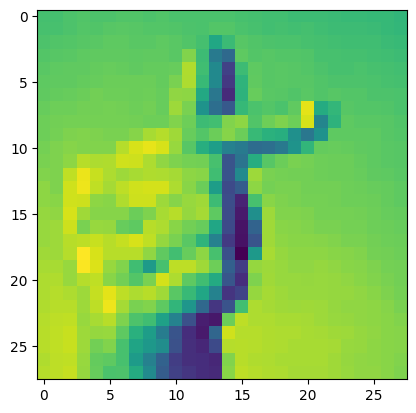

In [17]:
#Inpect image
plt.imshow(images[1001])

What is the need for Flattening of an Image?

Multi-Dimensional arrays take more amount of memory while 1-D arrays take less memory, which is the most important reason why we flatten the Image Array before processing/feeding the information to our model. In most cases, we will be dealing with a dataset which contains a large amount of images thus flattening helps in decreasing the memory as well as reducing the time to train the model.

In [18]:
#flat_images = [] 
#for i in images:
  #  flat_images.append(i.flatten())
#flat_images 

In [19]:
#X_train = flat_images

In [20]:
#X_train.shape

In [21]:
#from tensorflow.keras.utils import to_categorical

#y_train_cat = to_categorical(y_train,num_classes=25)

In [22]:
#y_train_cat

In [23]:
#One hot encode labels
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(y_train)

labels_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [24]:
y_test

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

In [25]:
len(y_test.unique())

24

In [26]:
#y_test_cat=to_categorical(y_test,num_classes=25)

In [27]:
y_train = labels_encoded

In [28]:
len(labels_encoded)

27455

In [29]:
X_train.shape

(27455, 784)

In [30]:
#train test split

#Did you mean  validation?
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

X_train, X_val, y_train, y_val = train_test_split(images, labels_encoded, train_size=0.7, random_state=42)

In [31]:
len(X_val),len(y_val)

(8237, 8237)

In [32]:
# Scale images
X_train = np.array(X_train) / 225
X_val = np.array(X_val) / 225

> 🧑🏻‍🏫 The shape of tensors fed into ***ConvNets*** is the following: `(NUMBER_OF_IMAGES, HEIGHT, WIDTH, CHANNELS)`

In [33]:
#Reshape into the size required by TF and keras
X_train.shape

(19218, 28, 28)

In [34]:
len(X_val)

8237

Use the **`expand_dims`** to add one dimension at the end of the training data and test data.

In [35]:
y_train.shape

(19218, 24)

In [36]:
y_val.shape

(8237, 24)

In [37]:
from tensorflow.keras.backend import expand_dims

X_train = expand_dims(X_train, axis=-1)
X_val = expand_dims(X_val, axis=-1)

print(X_train.shape)
print(X_val.shape)

(19218, 28, 28, 1)
(8237, 28, 28, 1)


2022-11-30 14:58:42.763544: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-30 14:58:42.763590: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-30 14:58:42.763609: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-IVMFFR3): /proc/driver/nvidia/version does not exist
2022-11-30 14:58:42.763883: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [38]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential

In [39]:
# TF >= 2.3.0
data_augmentation = models.Sequential(
    [
        #layers.experimental.preprocessing.RandomRotation(0.1),
        #layers.experimental.preprocessing.RandomZoom(.05, .05),#--> look at parameters
        layers.experimental.preprocessing.RandomFlip(mode="horizontal"),
        layers.experimental.preprocessing.RandomContrast(factor=0.1,),
    ]
)

In [40]:
## TF >= 2.3.0
#data_augmentation = models.Sequential(
  #  [
 #       layers.experimental.preprocessing.RandomRotation(0.1)
  #      layers.experimental.preprocessing.RandomZoom(.1, .1),#--> look at parameters
   #     layers.experimental.preprocessing.RandomFlip(mode="horizontal"),
    #    layers.experimental.preprocessing.RandomContrast(factor=0.1,),
   # ]
#)

In [41]:
from tensorflow.keras import layers
#from tensorflow.keras import models

def initialize_model():
    model = models.Sequential()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(16, kernel_size=(4,4), input_shape=(28,28,1), activation='relu', padding='same'))
    data_augmentation,
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Third Convolution & MaxPooling
    model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))


    ### Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(64, activation='relu'))

    ### Last layer - Classification Layer with 10 outputs corresponding to 24 letters in dataset
    model.add(layers.Dense(24, activation='softmax'))
    
    ### Model compilation
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

In [42]:
#Train our model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

model = initialize_model()
save_best_cb = ModelCheckpoint('models/initial-end-to-end', save_best_only = True)

es = EarlyStopping(patience = 5)

history = model.fit(X_train, 
                    y_train,
                    validation_data = (X_val,y_val),
                    batch_size = 32,
                    epochs = 50,
                    callbacks = [save_best_cb,es],
                    verbose = 1)

Epoch 1/50
597/601 [============================>.] - ETA: 0s - loss: 1.3809 - accuracy: 0.5750

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 7s 11ms/step - loss: 1.3753 - accuracy: 0.5766 - val_loss: 0.3562 - val_accuracy: 0.8782
Epoch 2/50
596/601 [============================>.] - ETA: 0s - loss: 0.1373 - accuracy: 0.9612

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 7s 12ms/step - loss: 0.1366 - accuracy: 0.9614 - val_loss: 0.0586 - val_accuracy: 0.9837
Epoch 3/50
599/601 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9980

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 8s 14ms/step - loss: 0.0192 - accuracy: 0.9980 - val_loss: 0.0282 - val_accuracy: 0.9928
Epoch 4/50
601/601 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9948

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 10s 16ms/step - loss: 0.0200 - accuracy: 0.9948 - val_loss: 0.0062 - val_accuracy: 0.9998
Epoch 5/50
601/601 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 8s 14ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.2346e-04 - val_accuracy: 1.0000
Epoch 6/50
600/601 [============================>.] - ETA: 0s - loss: 6.0057e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 8s 14ms/step - loss: 6.0027e-04 - accuracy: 1.0000 - val_loss: 5.8179e-04 - val_accuracy: 1.0000
Epoch 7/50
600/601 [============================>.] - ETA: 0s - loss: 3.8132e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 9s 16ms/step - loss: 3.8150e-04 - accuracy: 1.0000 - val_loss: 4.2514e-04 - val_accuracy: 1.0000
Epoch 8/50
601/601 [==============================] - 8s 13ms/step - loss: 0.0514 - accuracy: 0.9856 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 9/50
601/601 [==============================] - 7s 12ms/step - loss: 7.1918e-04 - accuracy: 1.0000 - val_loss: 5.6637e-04 - val_accuracy: 1.0000
Epoch 10/50
600/601 [============================>.] - ETA: 0s - loss: 3.2914e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 9s 15ms/step - loss: 3.2903e-04 - accuracy: 1.0000 - val_loss: 3.0305e-04 - val_accuracy: 1.0000
Epoch 11/50
598/601 [============================>.] - ETA: 0s - loss: 2.0249e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 8s 14ms/step - loss: 2.0292e-04 - accuracy: 1.0000 - val_loss: 2.1271e-04 - val_accuracy: 1.0000
Epoch 12/50
600/601 [============================>.] - ETA: 0s - loss: 1.3596e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 9s 14ms/step - loss: 1.3592e-04 - accuracy: 1.0000 - val_loss: 1.4028e-04 - val_accuracy: 1.0000
Epoch 13/50
600/601 [============================>.] - ETA: 0s - loss: 9.0234e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 8s 13ms/step - loss: 9.0203e-05 - accuracy: 1.0000 - val_loss: 9.8648e-05 - val_accuracy: 1.0000
Epoch 14/50
601/601 [==============================] - ETA: 0s - loss: 6.3390e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 8s 14ms/step - loss: 6.3390e-05 - accuracy: 1.0000 - val_loss: 7.1570e-05 - val_accuracy: 1.0000
Epoch 15/50
601/601 [==============================] - ETA: 0s - loss: 4.4806e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 9s 14ms/step - loss: 4.4806e-05 - accuracy: 1.0000 - val_loss: 5.8472e-05 - val_accuracy: 1.0000
Epoch 16/50
598/601 [============================>.] - ETA: 0s - loss: 3.2771e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 8s 14ms/step - loss: 3.2704e-05 - accuracy: 1.0000 - val_loss: 4.3489e-05 - val_accuracy: 1.0000
Epoch 17/50
598/601 [============================>.] - ETA: 0s - loss: 2.3775e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 8s 14ms/step - loss: 2.3699e-05 - accuracy: 1.0000 - val_loss: 3.1126e-05 - val_accuracy: 1.0000
Epoch 18/50
598/601 [============================>.] - ETA: 0s - loss: 1.6868e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 8s 14ms/step - loss: 1.6845e-05 - accuracy: 1.0000 - val_loss: 2.9072e-05 - val_accuracy: 1.0000
Epoch 19/50
600/601 [============================>.] - ETA: 0s - loss: 1.2435e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 8s 14ms/step - loss: 1.2432e-05 - accuracy: 1.0000 - val_loss: 2.3892e-05 - val_accuracy: 1.0000
Epoch 20/50
601/601 [==============================] - ETA: 0s - loss: 9.0672e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 8s 14ms/step - loss: 9.0672e-06 - accuracy: 1.0000 - val_loss: 1.3031e-05 - val_accuracy: 1.0000
Epoch 21/50
601/601 [==============================] - ETA: 0s - loss: 6.4439e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 8s 14ms/step - loss: 6.4439e-06 - accuracy: 1.0000 - val_loss: 1.2912e-05 - val_accuracy: 1.0000
Epoch 22/50
599/601 [============================>.] - ETA: 0s - loss: 4.7626e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 9s 15ms/step - loss: 4.7555e-06 - accuracy: 1.0000 - val_loss: 9.5043e-06 - val_accuracy: 1.0000
Epoch 23/50
597/601 [============================>.] - ETA: 0s - loss: 3.2651e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 9s 14ms/step - loss: 3.2589e-06 - accuracy: 1.0000 - val_loss: 6.9368e-06 - val_accuracy: 1.0000
Epoch 24/50
601/601 [==============================] - ETA: 0s - loss: 2.3521e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 9s 14ms/step - loss: 2.3521e-06 - accuracy: 1.0000 - val_loss: 5.1581e-06 - val_accuracy: 1.0000
Epoch 25/50
601/601 [==============================] - ETA: 0s - loss: 1.7912e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


INFO:tensorflow:Assets written to: models/initial-end-to-end/assets


601/601 [==============================] - 8s 14ms/step - loss: 1.7912e-06 - accuracy: 1.0000 - val_loss: 4.6730e-06 - val_accuracy: 1.0000
Epoch 26/50
601/601 [==============================] - 8s 13ms/step - loss: 0.0741 - accuracy: 0.9810 - val_loss: 0.0121 - val_accuracy: 0.9973
Epoch 27/50
601/601 [==============================] - 10s 17ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 6.6113e-04 - val_accuracy: 0.9999
Epoch 28/50
601/601 [==============================] - 11s 18ms/step - loss: 2.6836e-04 - accuracy: 1.0000 - val_loss: 4.0525e-04 - val_accuracy: 0.9999
Epoch 29/50
601/601 [==============================] - 10s 17ms/step - loss: 1.5494e-04 - accuracy: 1.0000 - val_loss: 3.4635e-04 - val_accuracy: 0.9999
Epoch 30/50
601/601 [==============================] - 11s 18ms/step - loss: 1.0421e-04 - accuracy: 1.0000 - val_loss: 2.5332e-04 - val_accuracy: 0.9999


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        272       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)        

In [44]:
#res = model.evaluate(X_test, y_test, verbose = 1 )
#print(f'The accuracy on the test set is of {res[1]*100:.2f} %')

In [45]:
history.history

{'loss': [1.3753445148468018,
  0.13663290441036224,
  0.01924501173198223,
  0.019998203963041306,
  0.0011179783614352345,
  0.0006002704030834138,
  0.00038149720057845116,
  0.051436614245176315,
  0.0007191750919446349,
  0.0003290315216872841,
  0.0002029202732956037,
  0.00013591923925559968,
  9.020258585223928e-05,
  6.3389576098416e-05,
  4.48064565716777e-05,
  3.270422894274816e-05,
  2.3699474695604295e-05,
  1.6844516721903346e-05,
  1.2432149560481776e-05,
  9.067231985682156e-06,
  6.443852271331707e-06,
  4.755514510179637e-06,
  3.2588691283308435e-06,
  2.3520626655226806e-06,
  1.7911668237502454e-06,
  0.07410910725593567,
  0.0041518486104905605,
  0.0002683635684661567,
  0.00015493787941522896,
  0.00010420635953778401],
 'accuracy': [0.5765948295593262,
  0.9614424109458923,
  0.9979706406593323,
  0.9948486089706421,
  1.0,
  1.0,
  1.0,
  0.985586404800415,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0

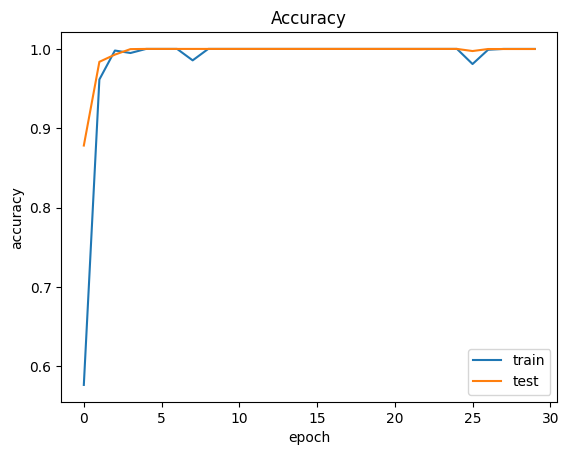

In [46]:
#Look at training history

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [47]:
import pickle
with open('models/intial-end-to-end-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

In [48]:
from tensorflow.keras import models
best_model = models.load_model('models/initial-end-to-end')

In [49]:
#One hot encode test label
def binarize(df):
    df_labels = df['label']
    df_labels = label_binarizer.fit_transform(df_labels)
    return df_labels

In [50]:
test_labels = binarize(test)

In [51]:
#Reshape test data so that we can evaluate it's performance on unseen data
def reshape_data(dataframe):
    
    dataframe.drop('label', axis=1, inplace=True)

    images = dataframe.values
    images = np.array([np.reshape(i, (28, 28)) for i in images])
    images = expand_dims(images, axis=-1)
    
    return images
    

In [52]:
test_images = reshape_data(test)
test_images

<tf.Tensor: shape=(7172, 28, 28, 1), dtype=int64, numpy=
array([[[[149],
         [149],
         [150],
         ...,
         [150],
         [150],
         [149]],

        [[150],
         [150],
         [150],
         ...,
         [151],
         [150],
         [151]],

        [[150],
         [151],
         [151],
         ...,
         [151],
         [151],
         [152]],

        ...,

        [[ 69],
         [ 69],
         [ 77],
         ...,
         [116],
         [113],
         [118]],

        [[ 74],
         [ 75],
         [ 76],
         ...,
         [110],
         [116],
         [113]],

        [[ 75],
         [ 74],
         [ 74],
         ...,
         [112],
         [120],
         [107]]],


       [[[126],
         [128],
         [131],
         ...,
         [133],
         [134],
         [132]],

        [[129],
         [132],
         [134],
         ...,
         [136],
         [136],
         [134]],

        [[133],
         [135],

In [53]:
res = model.evaluate(test_images, test_labels, verbose = 1 )
print(f'The accuracy on the test set is of {res[1]*100:.2f} %')

225/225 [==============================] - 2s 9ms/step - loss: 54.6854 - accuracy: 0.9342
The accuracy on the test set is of 93.42 %


In [54]:
#Evaluate performance on unseen data
y_pred = model.predict(test_images)

225/225 [==============================] - 2s 7ms/step


In [55]:
#Accuracy score

from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.9341885108756275

In [56]:
test_images[0]

<tf.Tensor: shape=(28, 28, 1), dtype=int64, numpy=
array([[[149],
        [149],
        [150],
        [150],
        [150],
        [151],
        [151],
        [150],
        [151],
        [152],
        [152],
        [152],
        [152],
        [152],
        [153],
        [153],
        [151],
        [152],
        [152],
        [153],
        [152],
        [152],
        [151],
        [151],
        [150],
        [150],
        [150],
        [149]],

       [[150],
        [150],
        [150],
        [152],
        [152],
        [151],
        [152],
        [152],
        [152],
        [152],
        [152],
        [153],
        [154],
        [153],
        [154],
        [154],
        [153],
        [154],
        [153],
        [154],
        [153],
        [153],
        [152],
        [152],
        [152],
        [151],
        [150],
        [151]],

       [[150],
        [151],
        [151],
        [152],
        [152],
        [152],
        [153],


In [57]:
test_images.shape

TensorShape([7172, 28, 28, 1])

In [58]:
tf.reshape(test_images[0],(1,28,28,1))

<tf.Tensor: shape=(1, 28, 28, 1), dtype=int64, numpy=
array([[[[149],
         [149],
         [150],
         [150],
         [150],
         [151],
         [151],
         [150],
         [151],
         [152],
         [152],
         [152],
         [152],
         [152],
         [153],
         [153],
         [151],
         [152],
         [152],
         [153],
         [152],
         [152],
         [151],
         [151],
         [150],
         [150],
         [150],
         [149]],

        [[150],
         [150],
         [150],
         [152],
         [152],
         [151],
         [152],
         [152],
         [152],
         [152],
         [152],
         [153],
         [154],
         [153],
         [154],
         [154],
         [153],
         [154],
         [153],
         [154],
         [153],
         [153],
         [152],
         [152],
         [152],
         [151],
         [150],
         [151]],

        [[150],
         [151],
         [151]

In [59]:
np.argmax(best_model.predict(tf.reshape(test_images[0],(1,28,28,1))))

1/1 [==============================] - 0s 154ms/step


6

In [60]:
#Load tensorflow modules
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

#batch_size = 100
#class_size = 24
#epochs = 10

In [61]:
len(y_test.unique())

24

In [62]:
from tensorflow.keras.layers import Reshape
from tensorflow.keras.preprocessing import image

def preprocess_image(image, image_file, best_model, label_binarizer):
    image = Reshape(image, [image.shape[0], image.shape[1], 1])
    image = image/255
    image = image.resize(image, [28, 28], preserve_aspect_ratio=True)
    preprocessed_image = np.ones((1, 28, 28, 1))
    preprocessed_image[0, :image.shape[0], :image.shape[1], :] = image
    prediction = best_model.predict(preprocessed_image)
    index_to_letter_map = {i:chr(ord('a') + i) for i in range(26)}
    letter = index_to_letter_map[label_binarizer.inverse_transform(prediction)[0]]
    return letter

In [63]:
from tensorflow.keras.utils import load_img, img_to_array

In [64]:
preprocess_image(image,image_file='images.jpg',best_model=best_model,label_binarizer=label_binarizer)

AttributeError: module 'keras.api._v2.keras.preprocessing.image' has no attribute 'shape'

In [ ]:
image = tf.keras.utils.load_img('images.jpg')
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

In [ ]:
image = tf.keras.utils.load_img('images.jpg')
plt.imshow(image)

In [ ]:
input_arr = tf.keras.utils.img_to_array(image)

In [ ]:
img = Image.fromarray(image.reshape(28,28,1))

In [ ]:
input_arr = np.array([input_arr])

In [ ]:
#image = Reshape(image, [image.shape[0], image.shape[1], 1])

In [ ]:
#predict_labels=binarize(input_arr)

In [ ]:
#image = Reshape(image, [image.shape[0], image.shape[1], 1])
#image = image/255
image = image.resize(image, [28, 28]).numpy()
#preprocessed_image = np.ones((1, 28, 28, 1))
#preprocessed_image[0, :image.shape[0], :image.shape[1], :] = image
#prediction = best_model.predict(preprocessed_image)

In [ ]:
#